In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import sys

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_val = X_test[:8000]
y_val = y_test[:8000]
X_test = X_test[8000:]
y_test = y_test[8000:]

In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(60000, 28, 28)
(2000, 28, 28)
(8000, 28, 28)


In [6]:
targets_names=["T-Shirt", "Trousers", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot" ]

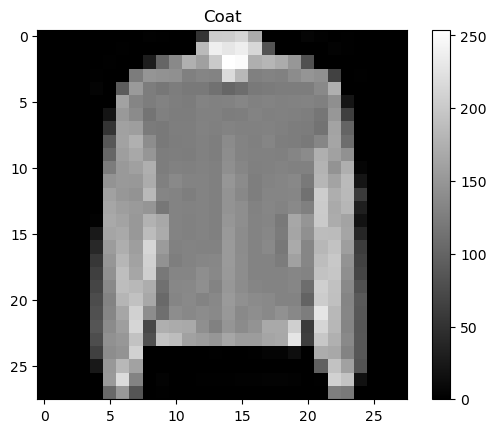

In [7]:
plt.figure()
plt.imshow(X_test[100], cmap='gray')
plt.colorbar()
plt.title(targets_names[y_test[100]])
plt.show()

In [8]:
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPooling2D, Flatten, Dense

In [9]:
model=tf.keras.Sequential([
Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
input_shape=(28, 28, 1)),
BatchNormalization(),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),

Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(128, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),        
MaxPooling2D(pool_size=(2, 2)),
        
Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
BatchNormalization(),
Conv2D(256, kernel_size=(3, 3), activation='relu'),
BatchNormalization(),    
MaxPooling2D(pool_size=(2, 2)),   
        
Flatten(),
        
Dense(1024, activation='relu'),
        
Dense(512, activation='relu'),
        
Dense(10, activation='softmax')
])
    
   

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=15,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
1875/1875 [==============================] - 193s 102ms/step - loss: 0.3832 - accuracy: 0.8617 - val_loss: 0.2815 - val_accuracy: 0.9019
Epoch 2/15
1875/1875 [==============================] - 198s 106ms/step - loss: 0.2624 - accuracy: 0.9072 - val_loss: 0.2966 - val_accuracy: 0.8986
Epoch 3/15
1875/1875 [==============================] - 203s 109ms/step - loss: 0.2216 - accuracy: 0.9199 - val_loss: 0.2462 - val_accuracy: 0.9149
Epoch 4/15
1875/1875 [==============================] - 198s 106ms/step - loss: 0.1889 - accuracy: 0.9316 - val_loss: 0.2744 - val_accuracy: 0.9029
Epoch 5/15
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1690 - accuracy: 0.9393 - val_loss: 0.2449 - val_accuracy: 0.9222
Epoch 6/15
1875/1875 [==============================] - 199s 106ms/step - loss: 0.1447 - accuracy: 0.9477 - val_loss: 0.2546 - val_accuracy: 0.9225
Epoch 7/15
1875/1875 [==============================] - 204s 109ms/step - loss: 0.1236 - accuracy: 0.9546 - val_

Add weight regularization

#### Applying L2 regularization

In [12]:
## L2

In [13]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1),
           kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(10, activation='softmax')
])


#### Dropout

In [14]:
## Droupout

In [15]:
from tensorflow.keras.layers import Dropout

model = tf.keras.Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


#### Early Stop

In [16]:
## Early Stop

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])


Epoch 1/15
1875/1875 [==============================] - 209s 111ms/step - loss: 0.5180 - accuracy: 0.8207 - val_loss: 0.3216 - val_accuracy: 0.8857
Epoch 2/15
1875/1875 [==============================] - 204s 109ms/step - loss: 0.3384 - accuracy: 0.8847 - val_loss: 0.3228 - val_accuracy: 0.8856
Epoch 3/15
1875/1875 [==============================] - 207s 111ms/step - loss: 0.3013 - accuracy: 0.8979 - val_loss: 0.2701 - val_accuracy: 0.9057
Epoch 4/15
1875/1875 [==============================] - 233s 124ms/step - loss: 0.2729 - accuracy: 0.9074 - val_loss: 0.2488 - val_accuracy: 0.9125
Epoch 5/15
1875/1875 [==============================] - 242s 129ms/step - loss: 0.2463 - accuracy: 0.9167 - val_loss: 0.2948 - val_accuracy: 0.8924
Epoch 6/15
1875/1875 [==============================] - 240s 128ms/step - loss: 0.2289 - accuracy: 0.9221 - val_loss: 0.2496 - val_accuracy: 0.9174
Epoch 7/15
1875/1875 [==============================] - 241s 129ms/step - loss: 0.2125 - accuracy: 0.9268 - val_

#### Data Augmentation

In [18]:
## Data Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Add channel dimension to the input data
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                          epochs=15,
                          validation_data=(X_val, y_val),
                          callbacks=[early_stop])


Epoch 1/15
1875/1875 [==============================] - 207s 110ms/step - loss: 0.4994 - accuracy: 0.8309 - val_loss: 0.2652 - val_accuracy: 0.9055
Epoch 2/15
1875/1875 [==============================] - 212s 113ms/step - loss: 0.3974 - accuracy: 0.8622 - val_loss: 0.2804 - val_accuracy: 0.9003
Epoch 3/15
1875/1875 [==============================] - 232s 124ms/step - loss: 0.3720 - accuracy: 0.8705 - val_loss: 0.3185 - val_accuracy: 0.8884
Epoch 4/15
1875/1875 [==============================] - 244s 130ms/step - loss: 0.3499 - accuracy: 0.8776 - val_loss: 0.2440 - val_accuracy: 0.9118
Epoch 5/15
1875/1875 [==============================] - 246s 131ms/step - loss: 0.3419 - accuracy: 0.8815 - val_loss: 0.2534 - val_accuracy: 0.9087
Epoch 6/15
1875/1875 [==============================] - 244s 130ms/step - loss: 0.3340 - accuracy: 0.8834 - val_loss: 0.2898 - val_accuracy: 0.8954
Epoch 7/15
1875/1875 [==============================] - 251s 134ms/step - loss: 0.3235 - accuracy: 0.8863 - val_